In [2]:
# Install the required libraries
!pip install prophet
!pip install jupyter_bokeh --upgrade
!pip install hvplot --upgrade
!pip install prophet


   ---------------------------------------- 0.0/155.4 kB ? eta -:--:--
   -- ------------------------------------- 10.2/155.4 kB ? eta -:--:--
   --------------------- ------------------ 81.9/155.4 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 155.4/155.4 kB 1.3 MB/s eta 0:00:00
  Attempting uninstall: hvplot
    Found existing installation: hvplot 0.9.2
    Uninstalling hvplot-0.9.2:
      Successfully uninstalled hvplot-0.9.2


In [4]:
#import supporting liberaries - Panda, Matplotlib, Prophet, Numpy, hvplot
import pandas as pd
import matplotlib.pyplot as plt
import prophet as Prophet
import numpy as np
import datetime as dt
import hvplot.pandas


In [9]:
#upload ufoSighting.csv - available at https://docs.google.com/spreadsheets/d/1iNNPzkDTDiaTnbYqBY4ELH_0rPts2uXgl_JSdKCEgUE/edit?usp=drive_link
path = 'resources/ufoSightings.csv'

In [10]:
#importing csv file in a dataframe
ufo_sightings_df = pd.read_csv(path,
                 #index_col="datetime",
                 parse_dates=['datetime'],
                 infer_datetime_format=True
                )

# Preview the dataset
ufo_sightings_df.head()

C:\Users\dipes\AppData\Local\Temp\ipykernel_29432\1677288385.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  ufo_sightings_df = pd.read_csv(path,
C:\Users\dipes\AppData\Local\Temp\ipykernel_29432\1677288385.py:2: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  ufo_sightings_df = pd.read_csv(path,


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [6]:
#write a labda function to convert 2 years of date in datetime column to concatenate 19 to digits after second '/' if 2 digits is less than 40
#ufo_sightings_df['datetime'] = ufo_sightings_df['datetime'].apply(lambda x: '19' + x if len(x.split('/')[2]) < 40 else x)
#ufo_sightings_df.head()

In [13]:
#cast datetime column as datetime datatype - #convert datetime column to datetime format
ufo_sightings_df['datetime'] = pd.to_datetime(ufo_sightings_df['datetime'], errors='coerce')
#ufo_sightings_df['datetime_1'] = ufo_sightings_df['datetime'].dt.strftime('%m/%d/%Y %H:%M')
ufo_sightings_df.dtypes

datetime                datetime64[ns]
city                            object
state                           object
country                         object
shape                           object
duration (seconds)              object
duration (hours/min)            object
comments                        object
date posted                     object
latitude                        object
longitude                      float64
dtype: object

In [14]:
#create a slice for country=us and drop any blank values and display first 5 and last 5 columns
us_ufo_df = ufo_sightings_df[ufo_sightings_df['country'] == 'us']
us_ufo_df = us_ufo_df.dropna(how='any')
display(us_ufo_df.head())
display(us_ufo_df.tail())

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
5,1961-10-10 19:00:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.595,-82.188889
7,1965-10-10 23:45:00,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175,-73.408333


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
80327,2013-09-09 21:15:00,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.165833,-86.784444
80328,2013-09-09 22:00:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.613611,-116.202500
80329,2013-09-09 22:00:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,9/30/2013,38.297222,-122.284444
80330,2013-09-09 22:20:00,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.901111,-77.265556
80331,2013-09-09 23:00:00,edmond,ok,us,cigar,1020.0,17 minutes,2 witnesses 2 miles apart&#44 Red &amp; White...,9/30/2013,35.652778,-97.477778


In [15]:
#drop unwanted columns like duration hour/min, comments, date posted
cleaned_us_ufo_df = us_ufo_df.drop(columns=['duration (hours/min)', 'comments', 'date posted'])
#cleaned_us_ufo_df.head()

In [16]:
#sorting data by datetime column
cleaned_us_ufo_df.sort_values(by=['datetime'], inplace=True)
cleaned_us_ufo_df.shape

(63099, 8)

In [13]:
#cleaned_us_ufo_df.dropna()

In [14]:
#df['Formatted_DOB'] = df['DOB'].dt.strftime('%m/%d/%Y %H:%M')

In [17]:
#Checking range data available in dataset
display(cleaned_us_ufo_df['datetime'].min())
cleaned_us_ufo_df['datetime'].max()

Timestamp('1910-06-01 15:00:00')

Timestamp('2014-05-08 00:00:00')

In [16]:
#us_ufo_df.dtypes

In [17]:
#ufo_sightings_dfpd.to_datetime(ufo_sightings_df['datetime'], errors='coerce')
#ufo_sightings_df['datetime_1'] = ufo_sightings_df['datetime'].dt.strftime('%m/%d/%Y %H:%M')

In [18]:
# convert datetime column from object to datetime and drop any rows that do not have a proper date
#us_ufo_df['datetime'] = pd.to_datetime(us_ufo_df['datetime'])
#us_ufo_df = us_ufo_df.dropna(how='any')

#cleaned_us_ufo_df['datetime'] = pd.to_datetime(ufo_sightings_df['datetime'], errors='coerce') # Use errors='coerce' to handle invalid dates
#cleaned_us_ufo_df.dropna(how='any').sort_values(by=['datetime'], ascending=True, inplace=True)
#cleaned_us_ufo_df.shape
#display(cleaned_us_ufo_df.head())
#display(cleaned_us_ufo_df.tail())
#display(cleaned_us_ufo_df.dtypes)
#us_ufo_df['datetime'] = pd.to_datetime(us_ufo_df['datetime'])

In [19]:
#display(cleaned_us_ufo_df.head())
#display(cleaned_us_ufo_df.tail())
#display(cleaned_us_ufo_df.dtypes)

In [18]:
#casting duration in seconds to float to perform agreegation
# Convert 'duration (seconds)' to numeric before calculating mean
cleaned_us_ufo_df['duration (seconds)'] = pd.to_numeric(cleaned_us_ufo_df['duration (seconds)'], errors='coerce')

#cleaned_us_ufo_df['duration (seconds)'] = cleaned_us_ufo_df['duration (seconds)'].astype(float)
#check to ensure conversion of column type
cleaned_us_ufo_df.dtypes

datetime              datetime64[ns]
city                          object
state                         object
country                       object
shape                         object
duration (seconds)           float64
latitude                      object
longitude                    float64
dtype: object

In [19]:
#add a column for year by extracting from datetime column to use for grouping and display last (10) records
cleaned_us_ufo_df['year'] = cleaned_us_ufo_df['datetime'].dt.year
cleaned_us_ufo_df.tail(10)

,datetime,city,state,country,shape,duration (seconds),latitude,longitude,year
46144,2014-05-07 03:30:00,calera,al,us,circle,240.0,33.1027778,-86.753611,2014
46145,2014-05-07 09:30:00,port richey,fl,us,unknown,1.0,28.2713889,-82.719722,2014
46147,2014-05-07 15:00:00,san jose,ca,us,disk,30.0,37.3394444,-121.893889,2014
46148,2014-05-07 17:30:00,lakeville,mn,us,oval,90.0,44.6497222,-93.242500,2014
46151,2014-05-07 20:30:00,visalia,ca,us,fireball,180.0,36.3302778,-119.291111,2014
46150,2014-05-07 20:30:00,seagrove beach,fl,us,fireball,60.0,30.3183333,-86.130278,2014
46152,2014-05-07 21:00:00,theodore,al,us,circle,120.0,30.5475,-88.175278,2014
46153,2014-05-07 21:10:00,naugatuck,ct,us,unknown,300.0,41.4858333,-73.051111,2014
46154,2014-05-07 21:20:00,hillsboro,mo,us,fireball,360.0,38.2322222,-90.562778,2014
46301,2014-05-08 00:00:00,memphis,tn,us,rectangle,900.0,35.1494444,-90.048889,2014


In [22]:
#cleaned_us_ufo_df.tail()

In [23]:
cleaned_us_ufo_df_copy = cleaned_us_ufo_df.copy()
cleaned_us_ufo_df_copy.dropna()
cleaned_us_ufo_df_copy.tail()
# drop NaT values from datetime
cleaned_us_ufo_df_copy = cleaned_us_ufo_df_copy[cleaned_us_ufo_df_copy['datetime'].notna()]
cleaned_us_ufo_df_copy.tail()

,datetime,city,state,country,shape,duration (seconds),latitude,longitude,year
46150,2014-05-07 20:30:00,seagrove beach,fl,us,fireball,60.0,30.3183333,-86.130278,2014
46152,2014-05-07 21:00:00,theodore,al,us,circle,120.0,30.5475,-88.175278,2014
46153,2014-05-07 21:10:00,naugatuck,ct,us,unknown,300.0,41.4858333,-73.051111,2014
46154,2014-05-07 21:20:00,hillsboro,mo,us,fireball,360.0,38.2322222,-90.562778,2014
46301,2014-05-08 00:00:00,memphis,tn,us,rectangle,900.0,35.1494444,-90.048889,2014


In [24]:
cleaned_us_ufo_df_copy.shape

(63099, 9)

In [25]:
#sort by datetime column to data in order of date
#cleaned_us_ufo_df_copy.sort_values(by=['datetime'], inplace=True)
#display(cleaned_us_ufo_df_copy.head(10))
#display(cleaned_us_ufo_df_copy.tail(10))

,duration (seconds)
year,
1995,1956.6
1996,7091.0
1997,2916.8
1998,1125.5
1999,1048.6
2000,959.8
2001,1363.3
2002,27054.8
2003,1172.9


<Axes: title={'center': 'Mean of seconds of UFO Sightings by Year'}, xlabel='year'>

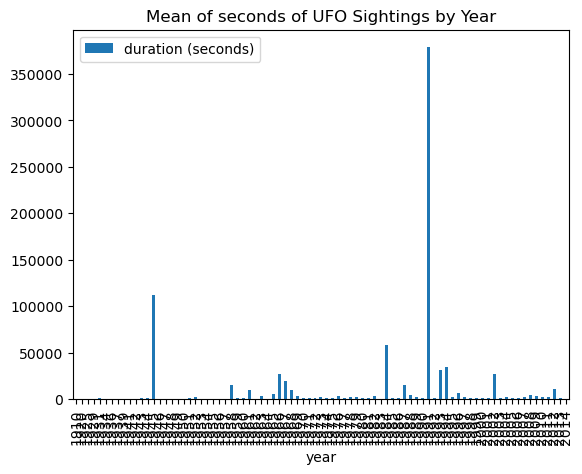

In [20]:
#create a pivot table for average sighting by year and visualize bar graph
us_ufo_df_year_avg = pd.pivot_table(cleaned_us_ufo_df,
                                    index='year',
                                    values='duration (seconds)',
                                    aggfunc='mean').round(1)
display(us_ufo_df_year_avg.tail(20))
display(us_ufo_df_year_avg.plot(kind='bar', title='Mean of seconds of UFO Sightings by Year'))

In [27]:
#visualize average sighting by year
#us_ufo_df_year_avg.plot(kind='bar', title='UFO Sightings by Year')

,duration (seconds)
year,
1985,167
1986,146
1987,171
1988,182
1989,189
1990,187
1991,177
1992,178
1993,221


<Axes: title={'center': 'Count of UFO Sightings by Year'}, xlabel='year'>

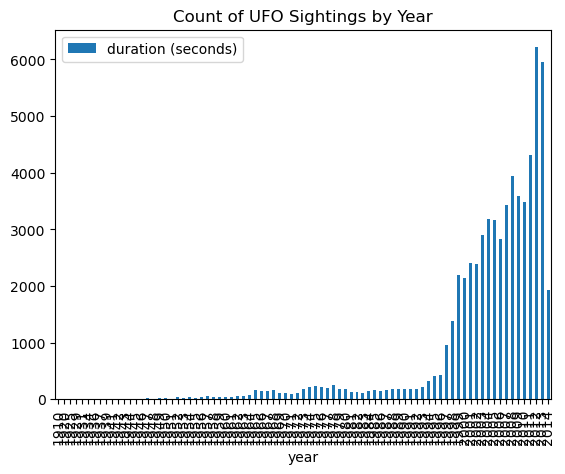

In [21]:
us_ufo_df_year = pd.pivot_table(cleaned_us_ufo_df,
                             index='year',
                             values='duration (seconds)',
                             aggfunc='count').round(1)
display(us_ufo_df_year.tail(30))
us_ufo_df_year.plot(kind='bar', title='Count of UFO Sightings by Year')

In [22]:
#create a dateframe from us_ufo_df_year where duration (seconds) is greater than 300
us_ufo_df_year_over_300 = us_ufo_df_year[us_ufo_df_year['duration (seconds)'] > 300]

#take 1st value of index and store it to variable named selected
selected = us_ufo_df_year_over_300.index[0]
selected

1994

In [ ]:
# get a list of year where duration (seconds) is over 1000
#us_ufo_df_year_over_1000 = cleaned_us_ufo_df[cleaned_us_ufo_df['duration (seconds)'] > 1000]
#over1000 = us_ufo_df_year_over_1000.index.tolist()
#over1000

In [31]:
#set datetime as index
#us_ufo_df.set_index('datetime', inplace=True)
#us_ufo_df.head()

In [ ]:
#sum of sightings by year using groupby
#cleaned_us_ufo_df['datetime'].groupby(by=[cleaned_us_ufo_df['datetime'].dt.isocalendar().year]).count()
#sum_by_year = us_ufo_df.groupby(by=[us_ufo_df.index.year]).sum()

In [ ]:
#state_total = cleamed_ufo_df.groupby('state').agg({'duration (seconds)': ['count', 'sum', 'mean']}) - sort value by count
#state_total = cleaned_us_ufo_df.groupby('state').agg({'duration (seconds)': ['count', 'sum', 'mean']})
#state_total.sort_values(by=[('duration (seconds)', 'count')], ascending=False)


In [ ]:
#calculate count and avg duration anf group by state
#cleaned_us_ufo_pivot = pd.pivot_table(cleaned_us_ufo_df,
#                             index='year',
#                             values='duration (seconds)',
#                             aggfunc='count').round(1)
#cleaned_us_ufo_pivot.tail(30)

In [ ]:
#cleaned_us_ufo_df

In [42]:
#agregate cola by count and mean and create a pivot table
mean_duration_by_state = pd.pivot_table(cleaned_us_ufo_df,
                             index='state',
                             values='duration (seconds)',
                             aggfunc='mean').round(1)
mean_duration_by_state


,duration (seconds)
state,
ak,3371.8
al,1422.5
ar,117721.9
az,6577.1
ca,2777.1
co,1330.2
ct,3623.0
dc,235.1
de,866.5


In [24]:
#group a dataframe by state and aggregate by count and sum

cleaned_us_ufo_df.groupby('state').agg({'duration (seconds)': ['count', 'sum', 'mean']})

duration (seconds)                            
                   count          sum           mean
state                                               
ak                   303   1021662.00    3371.821782
al                   625    889050.50    1422.480800
ar                   569  66983744.20  117721.870299
az                  2348  15443101.60    6577.130153
ca                  8620  23938330.47    2777.068500
co                  1378   1832989.00    1330.180697
ct                   857   3104923.80    3623.014936
dc                     7      1645.50     235.071429
de                   165    142969.50     866.481818
fl                  3732  55877497.00   14972.534030
ga                  1228   9510878.10    7745.014739
hi                   253   6728915.00   26596.501976
ia                   664    612247.00     922.058735
id                   506    467770.30     924.447233
il                  2431   2127954.07     875.341041
in                  1265   4031375.70    3186.858261
ks                   595    828832.50    1392.995798
ky                   833   3419545.50    4105.096639
la                   540   6812493.00   12615.727778
ma                  1224   1591448.00    1300.202614
md                   814    685851.30     842.569165
me                   541    653206.90    1207.406470
mi                  1772   1881509.10    1061.799718
mn                   989   1380805.83    1396.163630
mo                  1422   1579798.80    1110.969620
ms                   363   3378513.00    9307.198347
mt                   456   1048919.00    2300.260965
nc                  1711   2042733.35    1193.882729
nd                   123    140274.00    1140.439024
ne                   371    406951.00    1096.902965
nh                   482   1072798.50    2225.723029
nj                  1225   7779374.00    6350.509388
nm                   686   3794900.59    5531.925058
nv                   773   2385133.95    3085.554916
ny                  2894   8892767.55    3072.829147
oh                  2229   3178645.20    1426.040915
ok                   708    850349.30    1201.058333
or                  1652   1727993.28    1046.000775
pa                  2308   2988602.00    1294.888215
pr                    24     26200.00    1091.666667
ri                   222    469000.50    2112.614865
sc                   979   1081466.80    1104.664760
sd                   174    461998.50    2655.163793
tn                  1089   1851226.30    1699.932323
tx                  3367   8413489.25    2498.808806
ut                   608   3417542.00    5620.957237
va                  1238  13596298.00   10982.470113
vt                   253    264745.50    1046.424901
wa                  3686  56603953.44   15356.471362
wi                  1194   2314889.30    1938.768258
wv                   436   2973833.00    6820.717890
wy                   167    165013.00     988.101796

In [25]:
#based on analysis, extracting data for year which has data over 300
cleaned_us_ufo_df_new = cleaned_us_ufo_df[cleaned_us_ufo_df['year'] >= selected]
cleaned_us_ufo_df_new.head()

,datetime,city,state,country,shape,duration (seconds),latitude,longitude,year
10885,1994-01-01 00:00:00,el segundo,ca,us,other,1800.0,33.9191667,-118.415556,1994
10887,1994-01-01 18:00:00,ringwood,nj,us,unknown,240.0,41.1133333,-74.245833,1994
24283,1994-01-03 23:30:00,albuquerque (30-60 miles west of city),nm,us,triangle,240.0,35.0844444,-106.650556,1994
24471,1994-01-04 23:00:00,susquehanna,pa,us,triangle,300.0,41.9433333,-75.600000,1994
11891,1994-01-12 18:00:00,cedar key,fl,us,chevron,300.0,29.1383333,-83.035278,1994


In [26]:
#calculate count and avg duration anf group by state after 1990
us_ufo_state_count = pd.pivot_table(cleaned_us_ufo_df_new,
                             index='state',
                             values='duration (seconds)',
                             aggfunc='count').round(1)
us_ufo_state_count = us_ufo_state_count.sort_values(by=['duration (seconds)'], ascending=False)
#Selecting top 10 states by count
top_10_states_count = us_ufo_state_count[:-40]
top_10_states_count

,duration (seconds)
state,
ca,7930
fl,3491
wa,3470
tx,3007
ny,2522
az,2255
il,2235
pa,2080
oh,1992


In [27]:
#agregate by mean and create a pivot table
us_ufo_state_average = pd.pivot_table(cleaned_us_ufo_df_new,
                             index='state',
                             values='duration (seconds)',
                             aggfunc='mean').round(1)

us_ufo_state_average =us_ufo_state_average.sort_values(by=['duration (seconds)'], ascending=False)
top_10_states_average = us_ufo_state_average[:10]
top_10_states_average

,duration (seconds)
state,
hi,29100.3
wa,16250.7
fl,15898.8
la,14335.9
va,11981.1
ms,10941.6
wv,7497.7
ut,5979.3
nm,4631.1


In [28]:
#agregate by mean and create a pivot table
us_ufo_state_total_seconds = pd.pivot_table(cleaned_us_ufo_df_new,
                             index='state',
                             values='duration (seconds)',
                             aggfunc='sum').round(1)

us_ufo_state_total_seconds =us_ufo_state_total_seconds.sort_values(by=['duration (seconds)'], ascending=False)
us_ufo_state_total_seconds = us_ufo_state_total_seconds[:10]
us_ufo_state_total_seconds

,duration (seconds)
state,
wa,56389887.4
fl,55502855.0
ca,21518701.5
va,13514651.0
ny,8544800.4
la,6752194.0
hi,6693062.0
az,6520462.6
tx,4136171.2


In [31]:
us_ufo_state_df = pd.merge(us_ufo_state_count, us_ufo_state_average, on='state')
us_ufo_state_df.columns = ['count', 'average_duration']
us_ufo_state_df

,count,average_duration
state,,
ca,7930,2713.6
fl,3491,15898.8
wa,3470,16250.7
tx,3007,1375.5
ny,2522,3388.1
az,2255,2891.6
il,2235,750.1
pa,2080,1325.0
oh,1992,1116.1


In [32]:
us_ufo_state_df.describe()

,count,average_duration
count,52.000000,52.000000
mean,1106.596154,3588.584615
std,1284.706196,5303.259175
min,7.000000,235.100000
25%,409.750000,1023.825000
50%,730.500000,1383.900000
75%,1288.000000,3408.575000
max,7930.000000,29100.300000


In [52]:
#calculate 80th percentile 90th percentile
#display(us_ufo_state_df.quantile(0.8))
#display(us_ufo_state_df.quantile(0.9))

count               1566.40
average_duration    3902.66
Name: 0.8, dtype: float64

count                2253.00
average_duration    10597.21
Name: 0.9, dtype: float64

In [37]:
count_percentile80 = us_ufo_state_df['count'].quantile(0.8)
count_percentile90 = us_ufo_state_df['count'].quantile(0.9)
avg_percentile80 = us_ufo_state_df['average_duration'].quantile(0.8)
avg_percentile90 = us_ufo_state_df['average_duration'].quantile(0.9)

print(f"90% quantile of average duration is {round(avg_percentile90,2)}")
print(f"80% quantile of average duration is {round(avg_percentile80,2)}")
print(f"90% quantile of count is {count_percentile90}")
print(f"80% quantile of count is {count_percentile80}")


90% quantile of average duration is 10597.21
80% quantile of average duration is 3902.66
90% quantile of count is 2253.0
80% quantile of count is 1566.4


In [50]:
# create a dataframe from us_ufo_state_df that has count and avg duration greater than percentile80
us_ufo_state_top_df = us_ufo_state_df[us_ufo_state_df['count'] > count_percentile90]
us_ufo_state_top_df = us_ufo_state_df[(us_ufo_state_df['count'] >= count_percentile90) | (us_ufo_state_df['average_duration'] >= avg_percentile90)]
us_ufo_state_top_df

,count,average_duration
state,,
ca,7930,2713.6
fl,3491,15898.8
wa,3470,16250.7
tx,3007,1375.5
ny,2522,3388.1
az,2255,2891.6
va,1128,11981.1
la,471,14335.9
ms,303,10941.6


In [51]:
us_ufo_state_top_df = us_ufo_state_top_df.sort_values(by=["state"])
us_ufo_state_top_df

,count,average_duration
state,,
az,2255,2891.6
ca,7930,2713.6
fl,3491,15898.8
hi,230,29100.3
la,471,14335.9
ms,303,10941.6
ny,2522,3388.1
tx,3007,1375.5
va,1128,11981.1


In [48]:
#us_ufo_state_top_df.reset_index(inplace=True)
us_ufo_state_top_df

,count,average_duration
state,,
az,2255,2891.6
ca,7930,2713.6
fl,3491,15898.8
hi,230,29100.3
la,471,14335.9
ms,303,10941.6
ny,2522,3388.1
tx,3007,1375.5
va,1128,11981.1


In [52]:
us_ufo_state_top_df["average_duration_min"] = us_ufo_state_top_df['average_duration'] / 60
us_ufo_state_top_df["average_duration_hour"] = us_ufo_state_top_df['average_duration_min'] / 60
us_ufo_state_top_df.reset_index(inplace=True)
us_ufo_state_top_df

,state,count,average_duration,average_duration_min,average_duration_hour
0,az,2255,2891.6,48.193333,0.803222
1,ca,7930,2713.6,45.226667,0.753778
2,fl,3491,15898.8,264.980000,4.416333
3,hi,230,29100.3,485.005000,8.083417
4,la,471,14335.9,238.931667,3.982194
5,ms,303,10941.6,182.360000,3.039333
6,ny,2522,3388.1,56.468333,0.941139
7,tx,3007,1375.5,22.925000,0.382083
8,va,1128,11981.1,199.685000,3.328083
9,wa,3470,16250.7,270.845000,4.514083


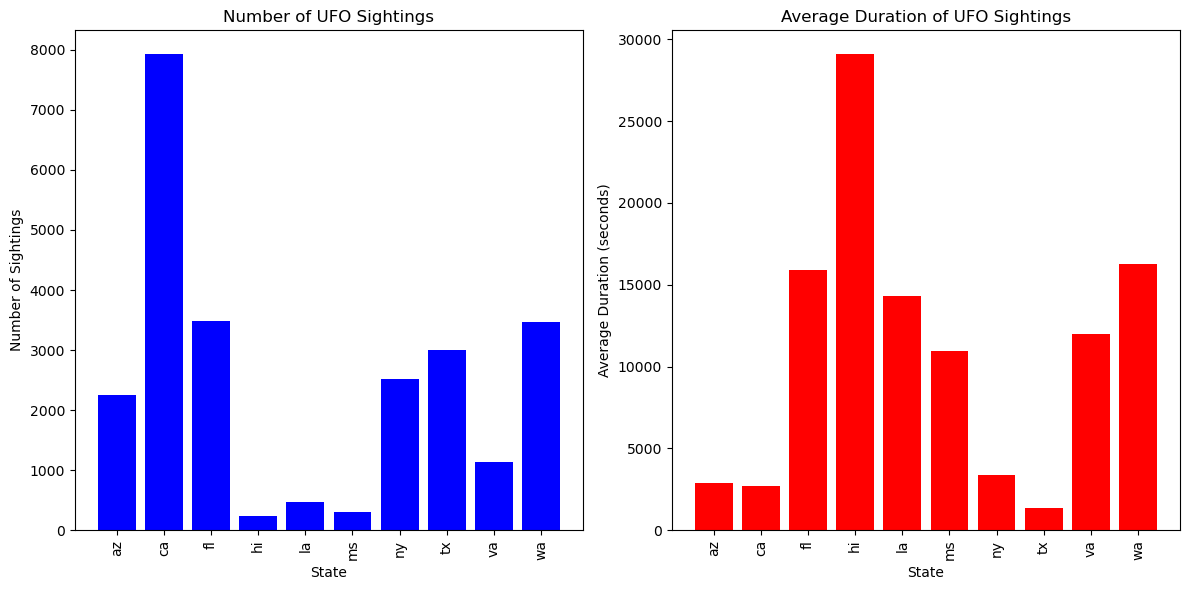

In [53]:
# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot the number of sightings on the first subplot
ax1.bar(us_ufo_state_top_df['state'], us_ufo_state_top_df['count'], color='blue')
ax1.set_xlabel('State')
ax1.set_ylabel('Number of Sightings')
ax1.set_title('Number of UFO Sightings')
ax1.tick_params(axis='x', rotation=90)

# Plot the average duration on the second subplot
ax2.bar(us_ufo_state_top_df['state'], us_ufo_state_top_df['average_duration'], color='red')
ax2.set_xlabel('State')
ax2.set_ylabel('Average Duration (seconds)')
ax2.set_title('Average Duration of UFO Sightings')
ax2.tick_params(axis='x', rotation=90)

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()


c:\Users\dipes\anaconda_3\Lib\site-packages\matplotlib\collections.py:1109: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


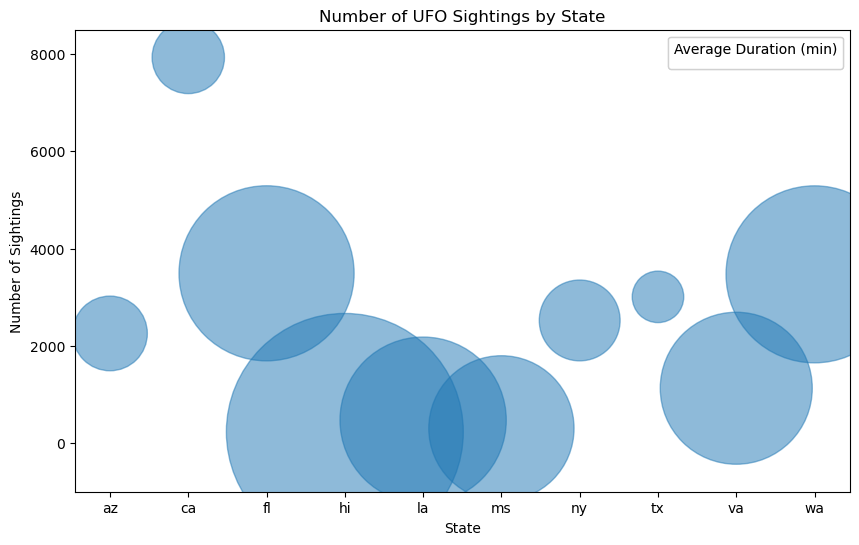

In [54]:
plt.figure(figsize=(10, 6))
fig = plt.scatter(us_ufo_state_top_df["state"], us_ufo_state_top_df["count"], s=us_ufo_state_top_df["average_duration"], alpha=0.5)
plt.ylim(-1000, 8500)
plt.title("Number of UFO Sightings by State")
plt.xlabel("State")
plt.ylabel("Number of Sightings")
legend = plt.legend(*fig.legend_elements(), title="Average Duration (min)")
plt.gca().add_artist(legend)
plt.show(fig)

In [55]:
#import matplotlib.pyplot as plt


# Calculate the correlation coefficient
correlation = us_ufo_state_top_df['count'].corr(us_ufo_state_top_df['average_duration_min'])
print("Correlation coefficient:", correlation)


Correlation coefficient: -0.48557160943179895


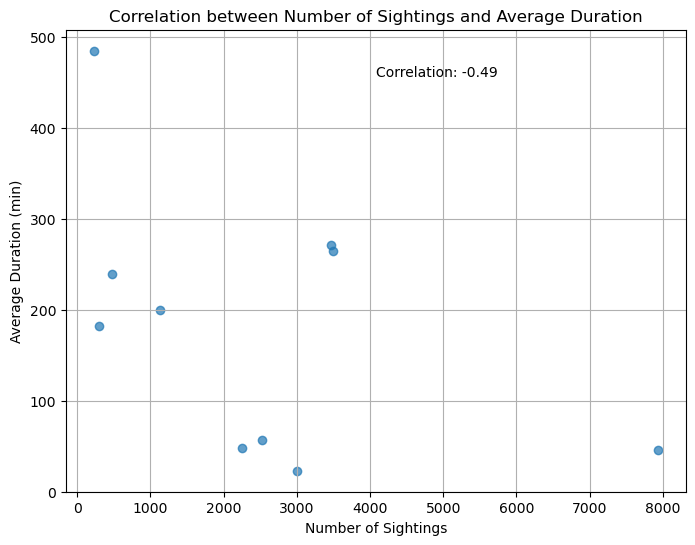

In [65]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(us_ufo_state_top_df['count'], us_ufo_state_top_df['average_duration_min'], alpha=0.7)
plt.xlabel('Number of Sightings')
plt.ylabel('Average Duration (min)')
plt.title('Correlation between Number of Sightings and Average Duration')

# Calculate and add the correlation coefficient to the plot
correlation = us_ufo_state_top_df['count'].corr(us_ufo_state_top_df['average_duration'])
plt.text(0.5, 0.9, f"Correlation: {correlation:.2f}", transform=plt.gca().transAxes)

plt.grid(True)
plt.show()

In [67]:
florida_df = cleaned_us_ufo_df_new.loc[cleaned_us_ufo_df_new['state'] == 'fl']
florida_seocnds_sum_df = pd.pivot_table(florida_df,
                            index='datetime',
                            values='duration (seconds)',
                            aggfunc='sum').round(1)
florida_seocnds_sum_df = florida_seocnds_sum_df.rename(columns={'duration (seconds)': 'total_seconds'})
florida_seocnds_sum_df.reset_index(inplace=True)
florida_seocnds_sum_df.head()

,datetime,total_seconds
0,1994-01-12 18:00:00,300.0
1,1994-04-04 17:00:00,7200.0
2,1994-04-15 22:00:00,1200.0
3,1994-06-12 21:30:00,720.0
4,1994-06-15 14:00:00,28800.0


In [68]:
washington_df = cleaned_us_ufo_df_new.loc[cleaned_us_ufo_df_new['state'] == 'wa']
washington_seocnds_sum_df = pd.pivot_table(washington_df,
                            index='datetime',
                            values='duration (seconds)',
                            aggfunc='sum').round(1)
washington_seocnds_sum_df = washington_seocnds_sum_df.rename(columns={'duration (seconds)': 'total_seconds'})
washington_seocnds_sum_df.reset_index(inplace=True)
washington_seocnds_sum_df.head()

,datetime,total_seconds
0,1994-03-08 19:15:00,5.0
1,1994-03-10 21:00:00,10.0
2,1994-06-01 18:00:00,1800.0
3,1994-06-15 23:00:00,20.0
4,1994-06-20 21:00:00,180.0


In [70]:
california_df = cleaned_us_ufo_df_new.loc[cleaned_us_ufo_df_new['state'] == 'wa']
california_seocnds_sum_df = pd.pivot_table(washington_df,
                            index='datetime',
                            values='duration (seconds)',
                            aggfunc='sum').round(1)
california_seocnds_sum_df = california_seocnds_sum_df.rename(columns={'duration (seconds)': 'total_seconds'})
california_seocnds_sum_df.reset_index(inplace=True)
california_seocnds_sum_df.head()

,datetime,total_seconds
0,1994-03-08 19:15:00,5.0
1,1994-03-10 21:00:00,10.0
2,1994-06-01 18:00:00,1800.0
3,1994-06-15 23:00:00,20.0
4,1994-06-20 21:00:00,180.0


In [71]:
florida_seocnds_sum_df.columns = ["ds", "y"]
washington_seocnds_sum_df.columns = ["ds", "y"]
california_seocnds_sum_df.columns = ["ds", "y"]


In [73]:
!pip install prophet

# Step 2: Import the Prophet class
from prophet import Prophet

23:08:41 - cmdstanpy - INFO - Chain [1] start processing
23:08:41 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\dipes\anaconda_3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\dipes\anaconda_3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
c:\Users\dipes\anaconda_3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this

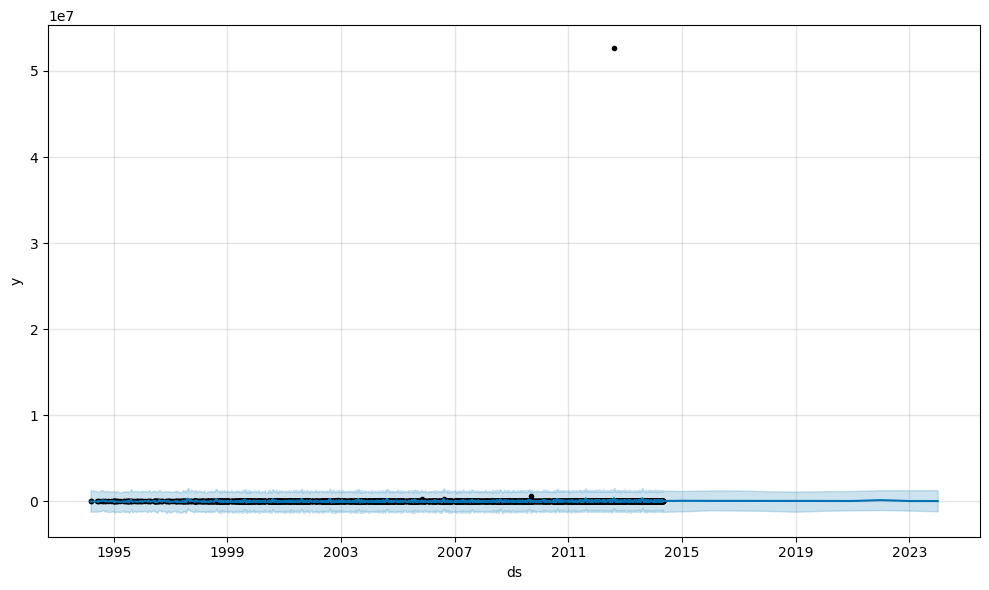

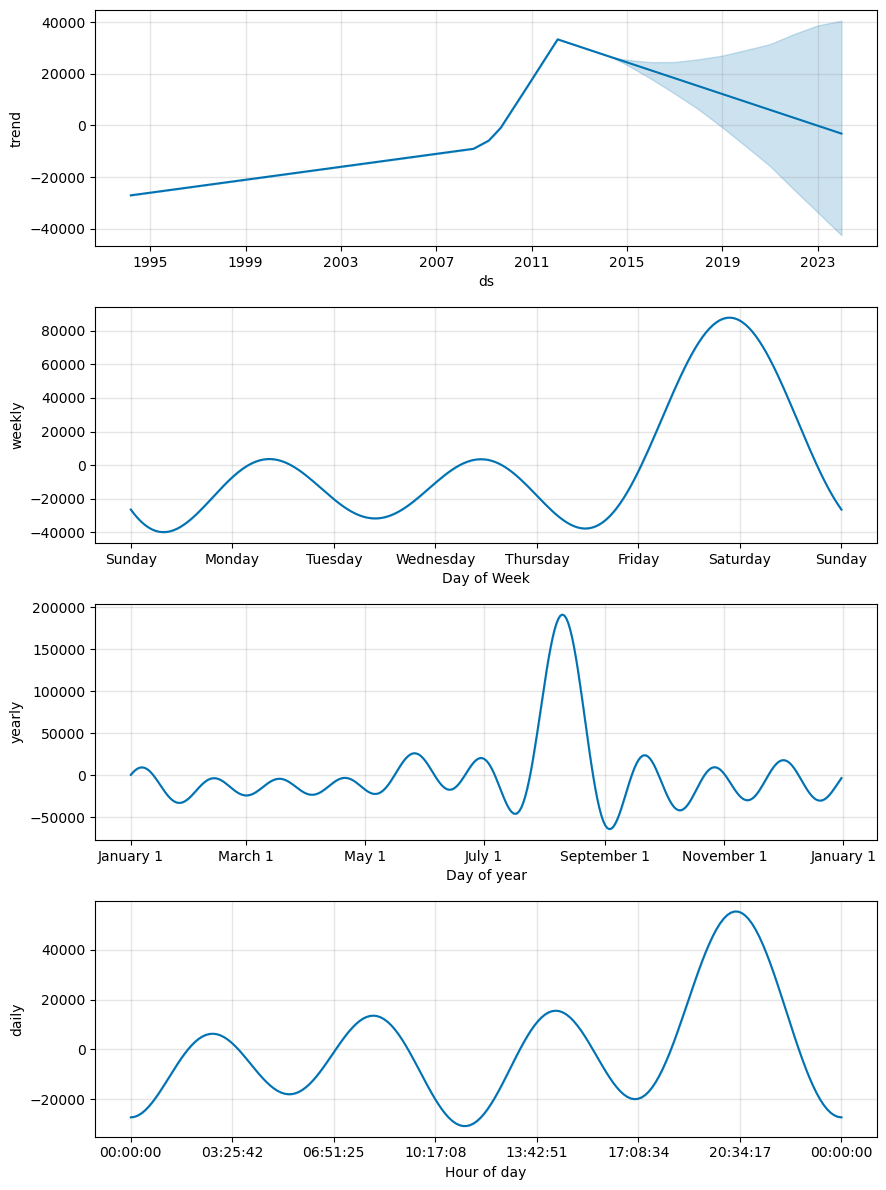

In [75]:
model = Prophet()
model.fit(washington_seocnds_sum_df)
future_trends_wa = model.make_future_dataframe(periods=10, freq="Y")
forecast_trends_wa = model.predict(future_trends_wa)
model.plot(forecast_trends_wa);
figures = model.plot_components(forecast_trends_wa)

23:09:20 - cmdstanpy - INFO - Chain [1] start processing
23:09:21 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\dipes\anaconda_3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\dipes\anaconda_3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
c:\Users\dipes\anaconda_3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this

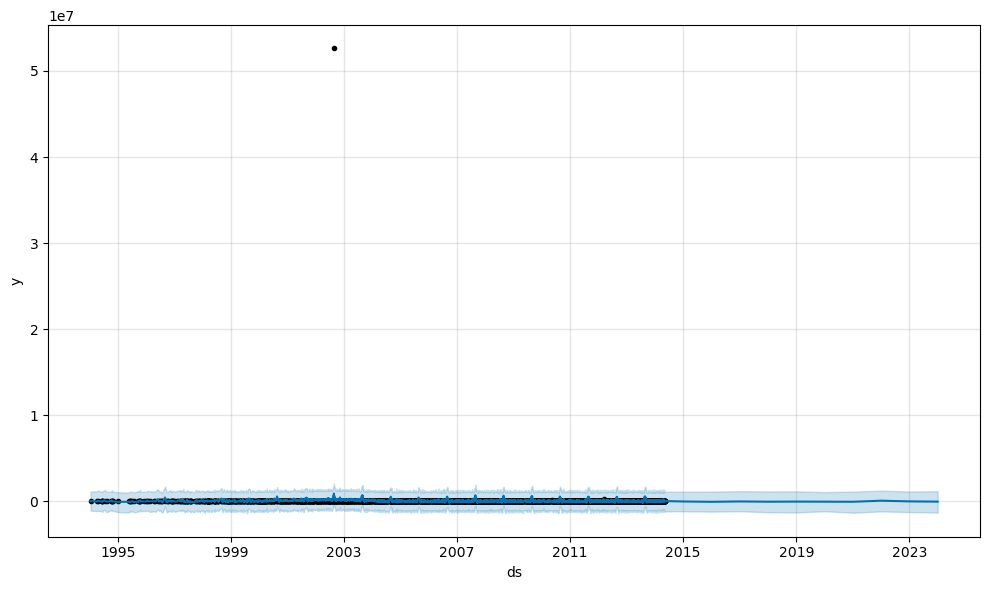

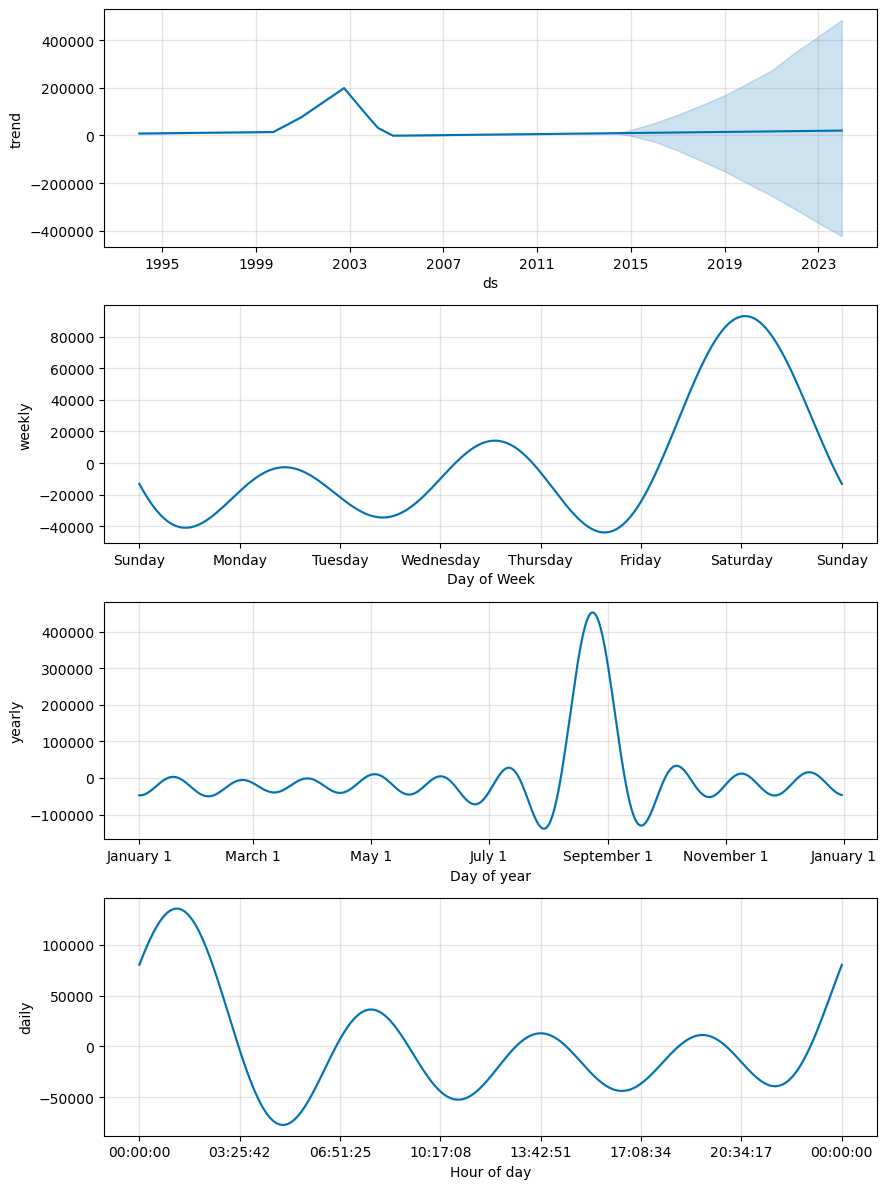

In [76]:
model = Prophet()
model.fit(florida_seocnds_sum_df)
florida_future = model.make_future_dataframe(periods=10, freq="Y")
fl_forecast = model.predict(florida_future)
model.plot(fl_forecast);
figures = model.plot_components(fl_forecast)

23:10:33 - cmdstanpy - INFO - Chain [1] start processing
23:10:33 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\dipes\anaconda_3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\dipes\anaconda_3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
c:\Users\dipes\anaconda_3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this

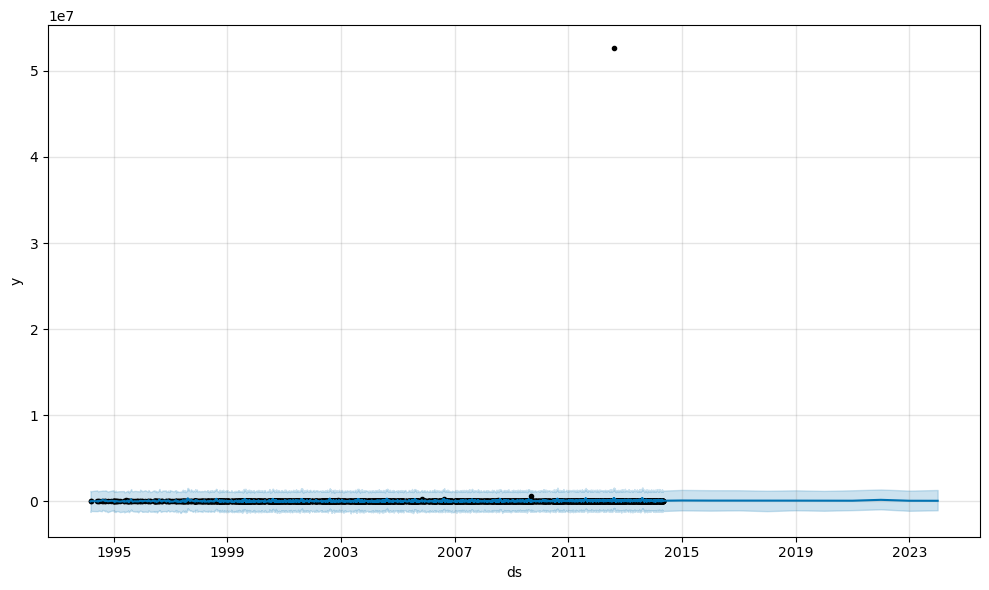

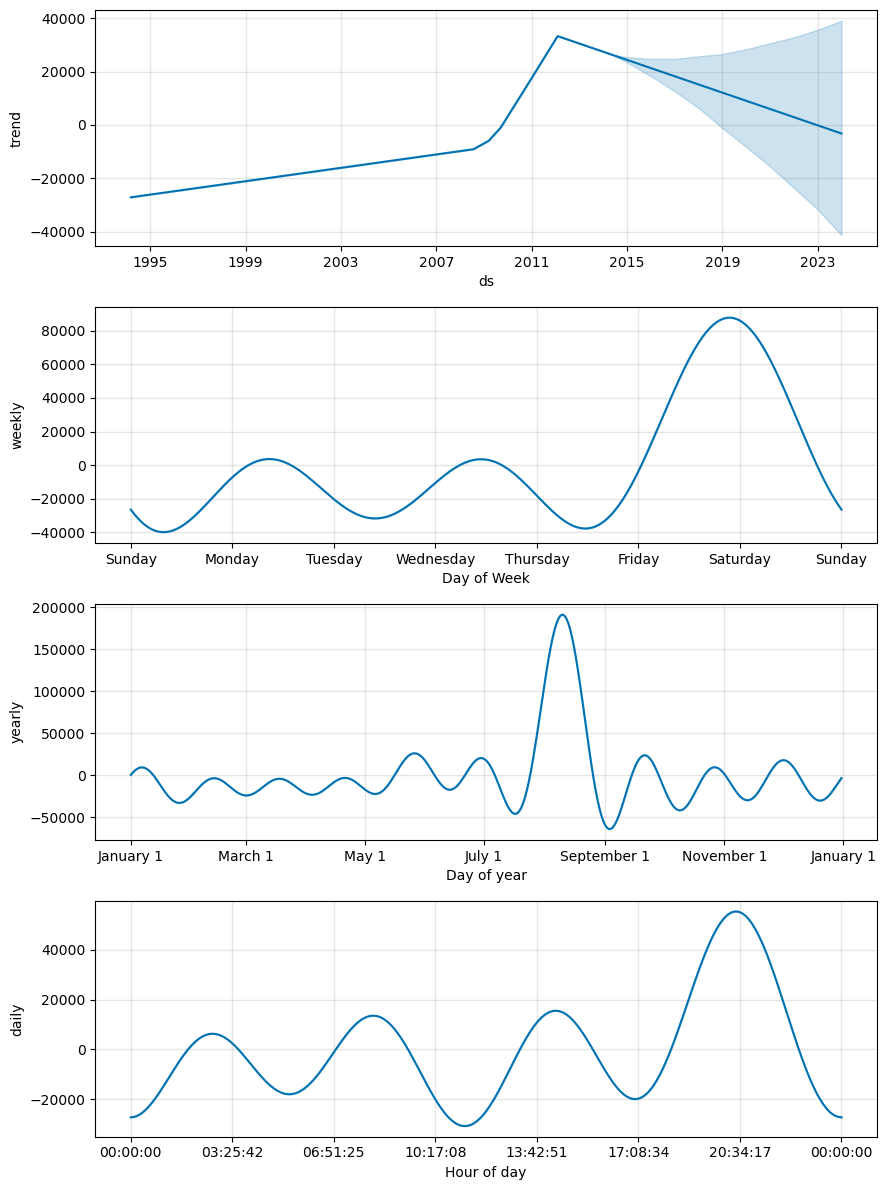

In [77]:
model = Prophet()
model.fit(california_seocnds_sum_df)
california_future = model.make_future_dataframe(periods=10, freq="Y")
ca_forecast = model.predict(california_future)
model.plot(ca_forecast);
figures = model.plot_components(ca_forecast)

In [78]:
# add a new empty column to ufo_shape_data labeled 'form'
cleaned_us_ufo_df['form'] = ''
cleaned_us_ufo_df.head()
# if value in ufo_shape_data_df['shape'] column equals cigar, circle, round, sphere, oval, egg, cylinder or disk, then value in ufo_shape_data_df['form'] column equals circular
cleaned_us_ufo_df.loc[cleaned_us_ufo_df['shape'].isin(['cigar', 'circle', 'round', 'sphere', 'oval', 'egg', 'cylinder', 'disk']), 'form'] = 'circular'
# if value in ufo_shape_data_df['shape'] column equals fireball, flare, flash or light, then value in ufo_shape_data_df['form'] column equals light
cleaned_us_ufo_df.loc[cleaned_us_ufo_df['shape'].isin(['fireball', 'flare', 'flash', 'light']), 'form'] = 'light'
# if value in ufo_shape_data_df['shape'] column equals chevron, delta, triangle, pyramid or cone, then value in ufo_shape_data_df['form'] column equals triangle
cleaned_us_ufo_df.loc[cleaned_us_ufo_df['shape'].isin(['chevron', 'delta', 'triangle', 'pyramid', 'cone']), 'form'] = 'triangle'
# if value in ufo_shape_data_df['shape'] column equals formation, changed or changing, then value in ufo_shape_data_df['form'] column equals formation_changing
cleaned_us_ufo_df.loc[cleaned_us_ufo_df['shape'].isin(['formation', 'changed', 'changing']), 'form'] = 'formation_changing'
# if value in ufo_shape_data_df['shape'] column equals diamond, hexagon, crescent, cross, rectangle or teardrop, then value in ufo_shape_data_df['form'] column equals geometric
cleaned_us_ufo_df.loc[cleaned_us_ufo_df['shape'].isin(['diamond', 'hexagon', 'crescent', 'cross', 'rectangle', 'teardrop']), 'form'] = 'geometric'
# if value in ufo_shape_data_df['shape'] column equals other or unknown, then value in ufo_shape_data_df['form'] column equals other_unknown
cleaned_us_ufo_df.loc[cleaned_us_ufo_df['shape'].isin(['other', 'unknown']), 'form'] = 'other_unknown'
cleaned_us_ufo_df.head()

,datetime,city,state,country,shape,duration (seconds),latitude,longitude,year,form
46858,1910-06-01 15:00:00,wills point,tx,us,cigar,120.0,32.7091667,-96.008056,1910,circular
46694,1920-06-11 21:00:00,cicero,in,us,unknown,60.0,40.1238889,-86.013333,1920,other_unknown
20951,1925-12-28 18:00:00,atkinson (6 miles north of),il,us,disk,60.0,41.4208333,-90.015000,1925,circular
62760,1929-07-05 14:00:00,buchanan (or burns),or,us,disk,60.0,43.6425,-118.627500,1929,circular
26550,1931-02-15 14:00:00,holyoke (6-8 miles southwest of),co,us,oval,60.0,40.5844444,-102.301944,1931,circular


In [79]:
geocoding_top_states = us_ufo_state_top_df['state'].tolist()
geocoding_top_states

['az', 'ca', 'fl', 'hi', 'la', 'ms', 'ny', 'tx', 'va', 'wa']

In [84]:
geo_df = cleaned_us_ufo_df.loc[cleaned_us_ufo_df['state'].isin(geocoding_top_states)]
geo_df.head()

,datetime,city,state,country,shape,duration (seconds),latitude,longitude,year,form
46858,1910-06-01 15:00:00,wills point,tx,us,cigar,120.0,32.7091667,-96.008056,1910,circular
66131,1937-08-15 21:00:00,fontana,ca,us,light,600.0,34.092222,-117.434167,1937,light
10813,1944-01-01 12:00:00,san diego,ca,us,cigar,180.0,32.7152778,-117.156389,1944,circular
46869,1945-06-01 13:30:00,jasper,fl,us,fireball,300.0,30.5180556,-82.948333,1945,light
54587,1945-07-10 01:30:00,portsmouth,va,us,formation,180.0,36.8352778,-76.298611,1945,formation_changing


In [93]:
geo_df["average_duration_min"] = geo_df['duration (seconds)'] / 60
geo_df["average_duration_hour"] = geo_df['average_duration_min'] / 60
geo_df.sort_values(by=['state'], inplace=True)
geo_df

,datetime,city,state,country,shape,duration (seconds),latitude,longitude,year,form,average_duration_min,average_duration_hour
1164,2012-10-12 18:55:00,phoenix,az,us,other,300.0,33.448333,-112.073333,2012,other_unknown,5.000000,0.083333
14506,2009-11-04 20:15:00,wellton,az,us,light,180.0,32.672778,-114.146111,2009,light,3.000000,0.050000
23533,2005-01-28 21:50:00,mesa,az,us,light,600.0,33.422222,-111.821944,2005,light,10.000000,0.166667
39256,2013-04-26 21:00:00,tucson,az,us,light,300.0,32.221667,-110.925833,2013,light,5.000000,0.083333
39110,2013-04-25 22:30:00,phoenix,az,us,circle,600.0,33.448333,-112.073333,2013,circular,10.000000,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...
64706,2012-08-11 23:00:00,bellingham,wa,us,circle,180.0,48.759722,-122.486944,2012,circular,3.000000,0.050000
21849,1998-12-03 23:30:00,kirkland,wa,us,triangle,60.0,47.681667,-122.207500,1998,triangle,1.000000,0.016667
57177,2009-07-15 22:00:00,marysville,wa,us,sphere,180.0,48.051944,-122.175833,2009,circular,3.000000,0.050000
57172,2009-07-15 13:30:00,bellevue,wa,us,unknown,2.0,47.610556,-122.199444,2009,other_unknown,0.033333,0.000556


In [ ]:
#Error while plotting: Geographic projection support requires: cartopy, geoviews.
#!pip install cartopy
#!pip install geoviews

In [ ]:
#!pip uninstall -y panel hvplot bokeh
#!pip install panel hvplot bokeh

In [94]:
# Load the cleaned data
#cleaned_ufo_df = pd.read_csv('cleaned_ufo_data.csv', index_col=False)

# Ensure there are no leading/trailing spaces in column names
geo_df.columns = geo_df.columns.str.strip()

# Drop the unnamed column if it exists
geo_df = geo_df.loc[:, ~geo_df.columns.str.contains('^Unnamed')]

# Ensure that 'longitude' and 'latitude' columns are of numeric type
geo_df['longitude'] = pd.to_numeric(geo_df['longitude'], errors='coerce')
geo_df['latitude'] = pd.to_numeric(geo_df['latitude'], errors='coerce')

# Check the columns to ensure they are correctly named and of numeric type
print("Column Names:")
print(geo_df.columns)
print("\nData Types:")
print(geo_df[['longitude', 'latitude']].dtypes)
print("\nFirst Few Rows:")
print(geo_df[['longitude', 'latitude']].head())

# Ensure that 'longitude' and 'latitude' columns exist and are correctly named
if 'longitude' in geo_df.columns and 'latitude' in geo_df.columns:
    # Plotting using hvplot
    try:
        fig = geo_df.hvplot.points(
            'longitude', 'latitude',  geo=True, c='shape',
            color = 'red',
            #aggregator ='count',
            s='average_duration_hour',
            #width=300, height=400, subplots=True, shared_axes=False,
            hover_cols=['year', 'city', 'form'],
            groupby=['state'],
            # #, #'city'],
            by='form',
            alpha=0.2, tiles='OSM',
            xlim=(-30,-160), ylim=(20,60), widget_location='bottom',
            #xlim=(float(cleaned_ufo_ca.longitude.min()), float(cleaned_ufo_ca.longitude.max())),
            #ylim=(float(cleaned_ufo_ca.latitude.min()), float(cleaned_ufo_ca.latitude.max()))
        )
        display(fig)  # Use display to render the plot inline in Jupyter
    except Exception as e:
        print(f"Error while plotting: {e}")
else:
    print("The columns 'longitude' and 'latitude' must be present in the DataFrame.")

Column Names:
Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'latitude', 'longitude', 'year', 'form', 'average_duration_min',
       'average_duration_hour'],
      dtype='object')

Data Types:
longitude    float64
latitude     float64
dtype: object

First Few Rows:
        longitude   latitude
1164  -112.073333  33.448333
14506 -114.146111  32.672778
23533 -111.821944  33.422222
39256 -110.925833  32.221667
39110 -112.073333  33.448333


BokehModel(combine_events=True, render_bundle={'docs_json': {'6f991c79-8b2d-492b-8d0d-34eb47cd1c9e': {'version…